# Lesson3: final part

[Lesson 3](https://github.com/BCDA-APS/use_bluesky/blob/master/notebooks/lesson3.ipynb) demonstrated how bluesky wcan show data as it is acquired.  This notebook provides a concise summary, which should be a good general starting point for users.

In [1]:
%matplotlib notebook
from bluesky.utils import install_nb_kicker
install_nb_kicker()

from ophyd import EpicsMotor
from ophyd.scaler import ScalerCH
from bluesky import RunEngine
import bluesky.plans as bp
from bluesky.callbacks.best_effort import BestEffortCallback
from apstools.devices import use_EPICS_scaler_channels

In [2]:
RE = RunEngine({})
RE.subscribe(BestEffortCallback())

P = "vm7:"     # use your IOC's PV prefix here

m1 = EpicsMotor(f"{P}m1", name="m1")
scaler = ScalerCH(f"{P}scaler1", name="scaler")
scaler.select_channels(None)

Count the detector (5 times)

Transient Scan ID: 1     Time: 2019-03-08 17:15:29
Persistent Unique Scan ID: 'c8829fd9-dcd4-43fc-bb7f-2d4309f2a0d1'
New stream: 'primary'
+-----------+------------+------------+------------+------------+
|   seq_num |       time |      clock |         I0 |      scint |
+-----------+------------+------------+------------+------------+


<IPython.core.display.Javascript object>


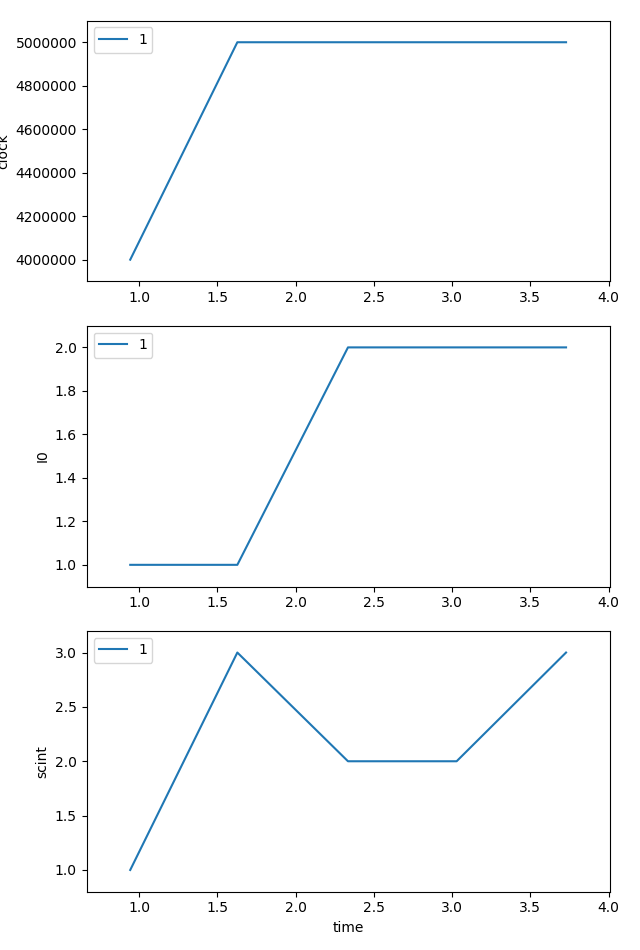

|         1 | 17:15:30.3 |    4000000 |          1 |          1 |
|         2 | 17:15:31.0 |    5000000 |          1 |          3 |
|         3 | 17:15:31.7 |    5000000 |          2 |          2 |
|         4 | 17:15:32.4 |    5000000 |          2 |          2 |
|         5 | 17:15:33.1 |    5000000 |          2 |          3 |
+-----------+------------+------------+------------+------------+
generator count ['c8829fd9'] (scan num: 1)





('c8829fd9-dcd4-43fc-bb7f-2d4309f2a0d1',)

In [3]:
RE(bp.count([scaler], num=5))

Scan the scaler *vs.* the motor with 5 data points.

Transient Scan ID: 2     Time: 2019-03-08 17:15:33
Persistent Unique Scan ID: '6dd7bde7-d5db-4fcc-939d-06c562592212'
New stream: 'primary'
+-----------+------------+------------+------------+------------+------------+
|   seq_num |       time |         m1 |      clock |         I0 |      scint |
+-----------+------------+------------+------------+------------+------------+


<IPython.core.display.Javascript object>


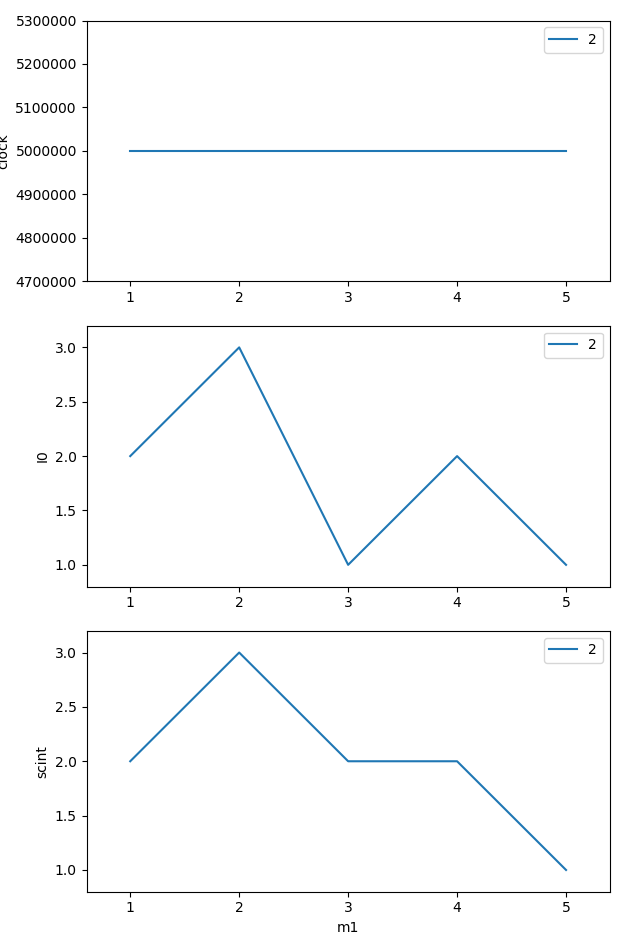

|         1 | 17:15:35.0 |    1.00000 |    5000000 |          2 |          2 |
|         2 | 17:15:36.2 |    2.00000 |    5000000 |          3 |          3 |
|         3 | 17:15:37.3 |    3.00000 |    5000000 |          1 |          2 |
|         4 | 17:15:38.1 |    4.00000 |    5000000 |          2 |          2 |
|         5 | 17:15:39.0 |    5.00000 |    5000000 |          1 |          1 |
+-----------+------------+------------+------------+------------+------------+
generator scan ['6dd7bde7'] (scan num: 2)





('6dd7bde7-d5db-4fcc-939d-06c562592212',)

In [4]:
RE(bp.scan([scaler], m1, 1, 5, 5))